<a href="https://colab.research.google.com/github/onatyap/binaryCarClassification/blob/master/model_and_prediction_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Car Classification

Imports

In [ ]:
import os, shutil
import numpy as np
import pandas as pd
import tensorflow
from PIL import Image
import seaborn as sns
from skimage import transform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display

Base directory in Drive

In [ ]:
base_dir = 'ENGR 350 Project/Dataset/binary_doblo_passat'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_passat_dir = os.path.join(train_dir, 'passat')
train_doblo_dir = os.path.join(train_dir, 'doblo')

In [ ]:
validation_passat_dir = os.path.join(validation_dir, 'passat')
validation_doblo_dir = os.path.join(validation_dir, 'doblo')

In [ ]:
test_passat_dir = os.path.join(test_dir, 'passat')
test_doblo_dir = os.path.join(test_dir, 'doblo')

## Sequential Model

In [ ]:
classifier = Sequential()
#Convolution and Pooling Layer 1
classifier.add(Convolution2D(16,kernel_size=(5,5),input_shape=(150,150,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

#Convolution and Pooling Layer 2
classifier.add(Convolution2D(32,kernel_size=(5,5),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

#Convolution and Pooling Layer 3
classifier.add(Convolution2D(64,kernel_size=(4,4),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(units=512,activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

### Model Summary

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)       

In [ ]:
classifier.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

## Train and Test Image Data Generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.3,zoom_range=0.3,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = train_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
os.chdir(original_dataset_dir)

This part is commented out to avoid re-training and overwriting already trained model.

In [ ]:

#history = classifier.fit(train_generator,
#                         epochs=30,
#                         validation_data=validation_generator)
#classifier.save('doblo_passat.h5')

Since the model won't be trained we need the saved h5 model to make predictions.

In [3]:
from keras.models import load_model
original_dataset_dir = 'ENGR 350 Project/Dataset'

classifier = load_model(os.path.join(original_dataset_dir, 'doblo_passat.h5'))

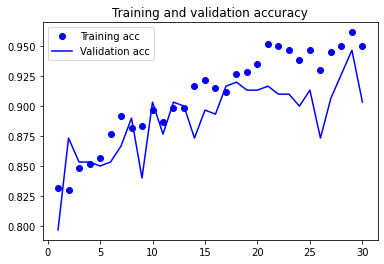

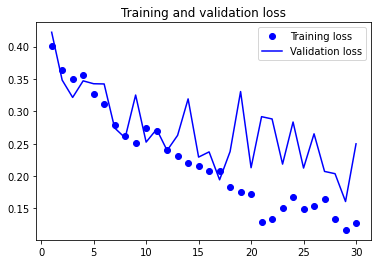

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test generation and evaluation

It turns out we achieved an accuracy of 92%.

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = classifier.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 300 images belonging to 2 classes.
10/10 [==============================] - 129s 13s/step - loss: 0.2467 - acc: 0.9150
test acc: 0.9150000214576721


In [23]:
cd Dataset

/content/drive/My Drive/University/Programming/Python/ENGR350 Assignments/ENGR 350 Project/Dataset


Load and transform the image to match the training data.

In [40]:
def load(filename):
  np_image = Image.open(filename)
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (150, 150, 3))
  np_image = np.expand_dims(np_image, axis=0)
  plt.imshow(Image.open(filename))
  return np_image

array([[0.8250239]], dtype=float32)

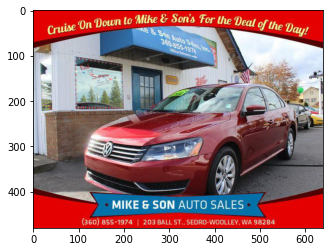

In [41]:
image = load('volkswagen_passat/volkswagen_passat00660.jpg')
classifier.predict(image)